In [12]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d

data = np.load('3d_keypoints.npy')
print(np.shape(data))

f_name = './Keypoints/detections/2017-05-30-15-57-34/detections_3d.csv'
raw_data = np.genfromtxt(f_name,delimiter = ',')
nice_data = np.reshape(raw_data,[695,20,3])

print(raw_data[0])
print(nice_data[0])
print(f_name.replace('.csv','_processed.npy'))
np.save('./test_reshape.npy',nice_data)
print(f_name)

(1791, 20, 3)
[0.29007 0.2143  0.32978 0.31024 0.19823 0.2855  0.26847 0.16138 0.24276
 0.26455 0.15731 0.21447 0.2956  0.1993  0.32571 0.30028 0.17989 0.30421
 0.27653 0.16033 0.27035 0.30316 0.18166 0.30289 0.25707 0.16283 0.24981
 0.29618 0.18041 0.25825 0.28773 0.18551 0.24659 0.29718 0.17558 0.23877
 0.29787 0.1999  0.32522 0.28935 0.20331 0.30091 0.28376 0.17102 0.28811
 0.3024  0.19005 0.29741 0.27145 0.17557 0.22932 0.28357 0.17634 0.25582
 0.28557 0.18227 0.24524 0.2948  0.20527 0.23934]
[[0.29007 0.2143  0.32978]
 [0.31024 0.19823 0.2855 ]
 [0.26847 0.16138 0.24276]
 [0.26455 0.15731 0.21447]
 [0.2956  0.1993  0.32571]
 [0.30028 0.17989 0.30421]
 [0.27653 0.16033 0.27035]
 [0.30316 0.18166 0.30289]
 [0.25707 0.16283 0.24981]
 [0.29618 0.18041 0.25825]
 [0.28773 0.18551 0.24659]
 [0.29718 0.17558 0.23877]
 [0.29787 0.1999  0.32522]
 [0.28935 0.20331 0.30091]
 [0.28376 0.17102 0.28811]
 [0.3024  0.19005 0.29741]
 [0.27145 0.17557 0.22932]
 [0.28357 0.17634 0.25582]
 [0.28557 0.

<IPython.core.display.Javascript object>


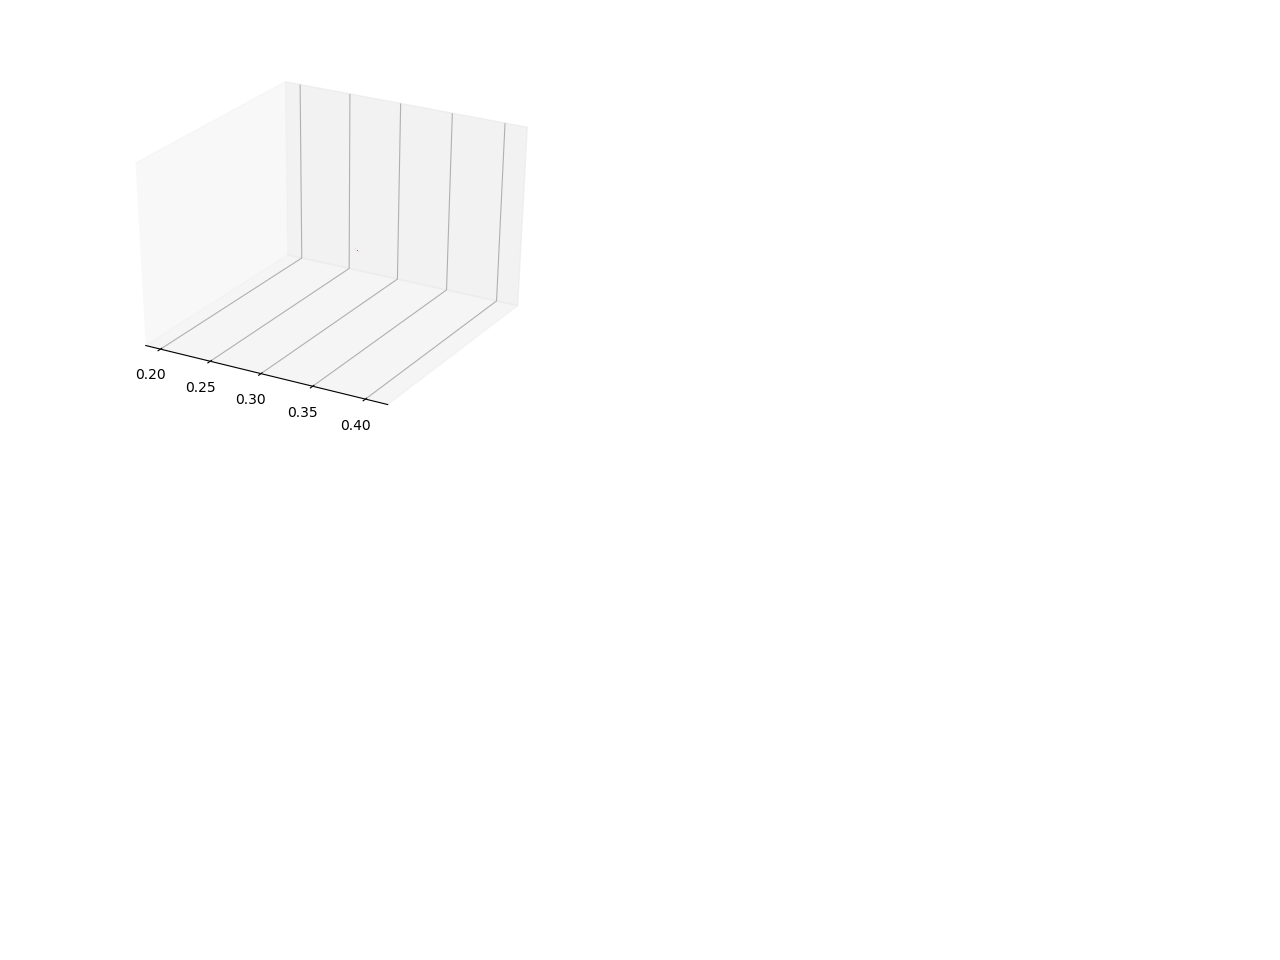

KeyboardInterrupt: 

In [2]:
%matplotlib notebook
keypoint = 0

fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.setxlim = [.20,.40]
ax.setylim = [.20,.40]
ax.setzlim = [.26,.36]

ax.scatter([.20,.40],[.20,.40],[.26,.36])

for t in range(len(data)):
    paths = ax.scatter(data[t,keypoint,0],data[t,keypoint,1],data[t,keypoint,2],color='red')
    fig.canvas.draw()
    paths.remove()

<IPython.core.display.Javascript object>


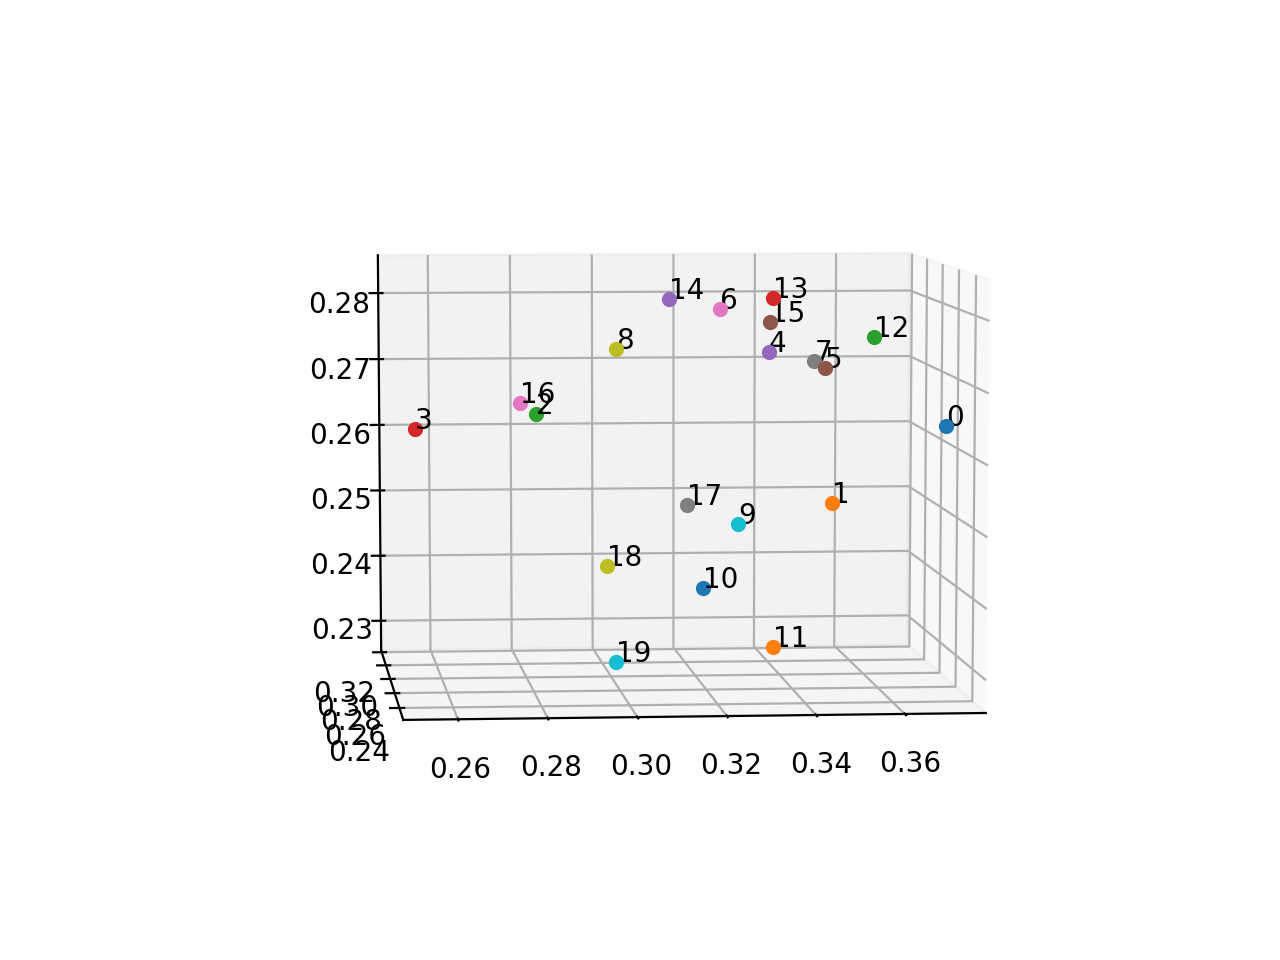

In [3]:
%matplotlib notebook
fig = plt.figure()
ax = plt.axes(projection = '3d')

for p in range(np.shape(data)[1]):
    ax.scatter(data[0,p,0],data[0,p,1],data[0,p,2])
    ax.text(data[0,p,0],data[0,p,1],data[0,p,2],str(p))
    plt.pause(.5)
    fig.canvas.draw()

In [4]:
#wing_distance = [np.linalg.norm(data[t,8,:] - data[t,16,:] for t in range(np.shape(data)[0]))]
actual_time = 18
song_onset = 2.7
ts = np.linspace(0,actual_time,len(data))
ts = ts - song_onset
wing_distance = np.zeros(np.shape(data)[0])
for t in range(len(wing_distance)):
    wing_distance[t] = np.linalg.norm(data[t,8,:] - data[t,16,:]) + .05
tail_height = data[:,3,2] -.1 #- data[0,3,2]
eye_center = (data[:,4,:] + data[:,15,:]) / 2
beak_offset = (data[:,0,2] - eye_center[:,2] ) * 2

In [5]:
from scipy.ndimage.filters import gaussian_filter

tail_height_smooth = gaussian_filter(tail_height, sigma=5)
wing_distance_smooth = gaussian_filter(wing_distance, sigma = 5)
beak_offset_smooth = gaussian_filter(beak_offset, sigma = 5)

<IPython.core.display.Javascript object>


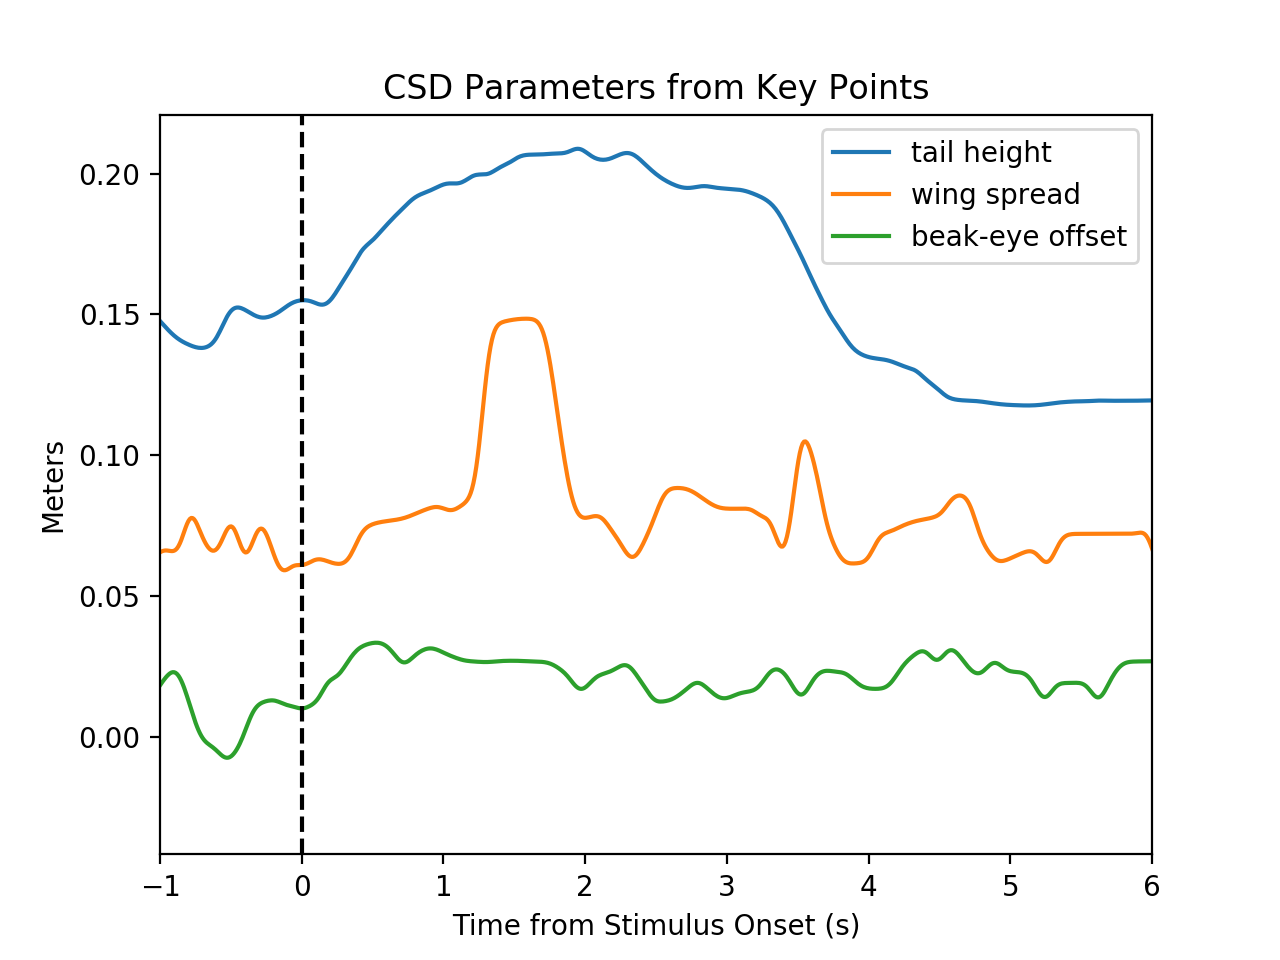

In [6]:
fig, ax = plt.subplots()


ax.plot(ts, tail_height_smooth,label='tail height')
ax.plot(ts, wing_distance_smooth, label='wing spread')
#ax.plot(eye_center)
ax.plot(ts, beak_offset_smooth, label='beak-eye offset')
ax.axvline(0,color='black',linestyle='--')

ax.set_xlim([-1,6])
ax.set_xlabel('Time from Stimulus Onset (s)')
ax.set_ylabel('Meters')

ax.legend()

ax.set_title('CSD Parameters from Key Points')

fig.show()

In [14]:
actual_time = 3
ts = np.linspace(0,actual_time,len(data))
print(ts, tail_height_smooth)

[0.00000000e+00 1.67597765e-03 3.35195531e-03 ... 2.99664804e+00
 2.99832402e+00 3.00000000e+00] [0.15971336 0.15971336 0.15971336 ... 0.15070977 0.15083061 0.15089239]


In [76]:
len(tail_height_smooth)

1791

In [31]:
## Find the origin (the mean of the mode of the feet)

## In original code, this is order
## I should reshape it to make the 3d_keypoints.npy that I use here.
"""
0-2 Beak Tip 0 
3-5 Keel 1
6-8 Tailbone 2
9-  Tip of Tail 3
12- Left Eye 4
15- Left Shoulder 5
18- Left Elbow 6
21- Left Wrist 7
24- Left Wing Tip 8
27- Left Knee 9
30- Left Ankle 10
33- Left Heel 11
36- Right Eye 12 
39- Right Shoulder 13
42- Right Elbow 14
45- RIght Wrist 15
48- Right Wing Tip 16
51- Right Knee 17
54- Right Ankle 18
57- Right Heel 19
"""

print('left foot:',stats.mode(data[:,11]))
print('right foot:',stats.mode(data[:,19]))

origin = np.mean([stats.mode(data[:,11]).mode[0],stats.mode(data[:,19]).mode[0]],0)
centered_data = data - origin
print("origin",origin)

left foot: ModeResult(mode=array([[0.33746716, 0.27746425, 0.23088126]]), count=array([[261, 261, 261]]))
right foot: ModeResult(mode=array([[0.29632115, 0.26202486, 0.22854112]]), count=array([[401, 401, 401]]))
origin [0.31689415 0.26974456 0.22971119]


In [51]:
np.shape(centered_data)
flat_data = np.reshape(centered_data,[1791,60])

In [52]:
## Now, first do a pca of the centered data on one bird
from sklearn.decomposition import PCA

pca = PCA()

principalComponents = pca.fit_transform(flat_data)

## Then do a pca of angles across one bird
## I should define the coordinate system for the space too.


In [53]:
np.round(pca.explained_variance_ratio_,2)

array([0.79, 0.06, 0.04, 0.03, 0.01, 0.01, 0.01, 0.01, 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  ])

In [56]:
print(np.round(pca.components_[0],3))

[-0.205  0.158 -0.045 -0.166  0.144 -0.026 -0.176  0.015 -0.009 -0.185
 -0.075  0.001 -0.21   0.141 -0.043 -0.217  0.129 -0.026 -0.212  0.087
 -0.016 -0.224  0.123 -0.025 -0.198  0.009 -0.006 -0.213  0.109 -0.015
 -0.231  0.072 -0.013 -0.23   0.104 -0.009 -0.202  0.153 -0.043 -0.182
  0.124 -0.025 -0.179  0.087 -0.017 -0.173  0.155 -0.027 -0.17   0.004
 -0.001 -0.175  0.123 -0.016 -0.159  0.043 -0.008 -0.152  0.088 -0.003]


In [66]:
len(pca.components_[0,:])

60

In [68]:
np.shape(principalComponents)

(1791, 60)

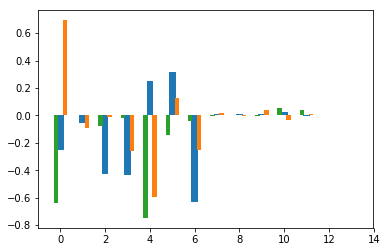

In [113]:
plt.bar(range(len(pca_angle.components_[0])),pca_angle.components_[0],width=.3)
plt.bar(np.arange(len(pca_angle.components_[0]))+.2,pca_angle.components_[1],width=.2)
plt.bar(np.arange(len(pca_angle.components_[0]))-.2,pca_angle.components_[2],width=.2)


plt.show()

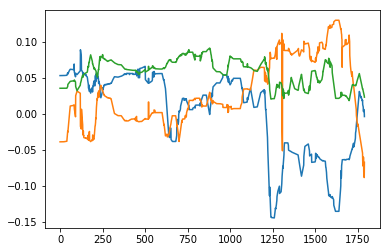

In [59]:
plt.plot(flat_data[:,0])
plt.plot(flat_data[:,1])
plt.plot(flat_data[:,2])

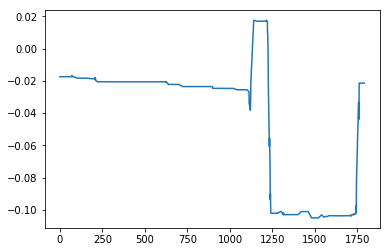

In [73]:
plt.plot(centered_data[:,-1,0])

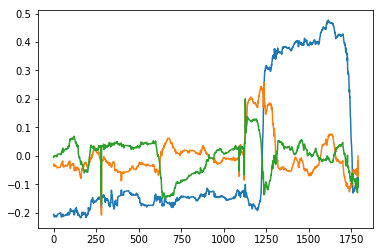

In [75]:
## Write 
plt.plot(principalComponents[:,0])
plt.plot(principalComponents[:,1])
plt.plot(principalComponents[:,2])

plt.show()

In [95]:
## Calculate all the angles!! 

def angle(v1,v2):
    #angle = np.arccos(np.dot(v1,v2)/(np.linalg.norm(v1) * np.linalg.norm(v2)))
    angle = np.arctan(np.linalg.norm(v1-v2)/np.linalg.norm(v1))
## Quick hack to keep track of directionality 
    if v2[2] < v1[2]:
        angle = angle * -1
    deg_angle = np.round(np.degrees(angle),4)
    return deg_angle

eye_center = np.mean([centered_data[:,4],centered_data[:,12]],0)
shoulder_center = np.mean([centered_data[:,5],centered_data[:,13]],0)

full_data = np.empty([1791,22,3])
full_data[:,:20] = centered_data
full_data[:,20] = eye_center
full_data[:,21] = shoulder_center

"""
0-2 Beak Tip 0 BT
3-5 Keel 1 KE
6-8 Tailbone 2 TB
9-  Tip of Tail 3 TT
12- Left Eye 4 LE
15- Left Shoulder 5 LS
18- Left Elbow 6 LB
21- Left Wrist 7 LW
24- Left Wing Tip 8 LT
27- Left Knee 9 LK
30- Left Ankle 10 LA
33- Left Heel 11 LH
36- Right Eye 12 RE
39- Right Shoulder 13 RS
42- Right Elbow 14 RB
45- RIght Wrist 15 RW
48- Right Wing Tip 16 RT
51- Right Knee 17 RK
54- Right Ankle 18 RA
57- Right Heel 19 RH
Eye Center (mean of 4,12): 20 EC 
Neck (shoulder Center, mean of 5,13): 21 NC
"""
## Define all the angles!!! =/
# Calculate all the angles!!! :D
angle_dict = {
    'neck-eye-beak':0,
    'eye-eye_center-horizontal':1,
    'left_elbow-wrist-tip':2,
    'right_elbow-wrist-tip':3,
    'left_wrist-neck-wrist':4,
    'eye-neck-tailbone':5,
    'neck-tailbone-tail':6,
    'left_knee-tailbone-knee':7,
    'tailbone-left_knee-ankle':8,
    'tailbone-right_knee-ankle':9,
    'left_knee-ankle-heel':10,
    'right_knee-ankle-heel':11
}
all_angles = np.zeros([1791,14])
# Neck-eye-beak (NC_EC_BT): 20-21,20-0 
EC_NC = full_data[:,20] - full_data[:,21]
EC_BT = full_data[:,20] - full_data[:,0]
NC_EC_BT = [angle(v1,v2) for v1,v2 in zip(EC_NC,EC_BT)]
all_angles[:,0] = NC_EC_BT

# Eye-Eye_center-horizontal plane: 20-12(with z20),20-12
horizontal_eye = np.array(full_data[:,12])
horizontal_eye[:,2] = full_data[:,20,2]
EC_LE = full_data[:,20] - full_data[:,12]
EC_HP = full_data[:,20] - horizontal_eye
LE_EC_HP = [angle(v1,v2) for v1,v2 in zip(EC_LE,EC_HP)]
all_angles[:,1] = LE_EC_HP

# Elbow-wrist-tip: 7-6,7-8 
LW_LB = full_data[:,7] - full_data[:,6]
LW_LT = full_data[:,7] - full_data[:,8]
LB_LW_LT = [angle(v1,v2) for v1,v2 in zip(LW_LB,LW_LT)]
all_angles[:,2] = LB_LW_LT

# Right EWT: 15-14, 15-16
RW_RB = full_data[:,15] - full_data[:,14]
RW_RT = full_data[:,15] - full_data[:,16]
RB_RW_RT = [angle(v1,v2) for v1,v2 in zip(RW_RB,RW_RT)]
all_angles[:,3] = RB_RW_RT

# Wrist-Neck-wrist: 21-7,21-15
NC_LW = full_data[:,21] - full_data[:,7]
NC_RW = full_data[:,21] - full_data[:,15]
LW_NC_RW = [angle(v1,v2) for v1,v2 in zip(NC_LW,NC_RW)]
all_angles[:,4] = LW_NC_RW

# Eye-Neck-Tailbone: 21-2,21-20
NC_TB = full_data[:,21] - full_data[:,2]
NC_EC = full_data[:,21] - full_data[:,20]
EC_NC_TB = [angle(v1,v2) for v1,v2 in zip(NC_TB,NC_EC)]
all_angles[:,5] = EC_NC_TB

# Neck-Tailbone-Tail: 2-21,2-3
TB_NC = full_data[:,2] - full_data[:,21]
TB_TT = full_data[:,2] - full_data[:,3]
NC_TB_TT = [angle(v1,v2) for v1,v2 in zip(TB_NC,TB_TT)]
all_angles[:,6] = NC_TB_TT

# Knee-Tailbone-Knee: 2-9,2-17
TB_LK = full_data[:,2] - full_data[:,9]
TB_RK = full_data[:,2] - full_data[:,17]
LK_TB_RK = [angle(v1,v2) for v1,v2 in zip(TB_LK,TB_RK)]
all_angles[:,7] = LK_TB_RK

# Tailbone-Knee-Ankle: 9-2,9-10
LK_TB = full_data[:,9] - full_data[:,2]
LK_LA = full_data[:,9] - full_data[:,10]
TB_LK_LA = [angle(v1,v2) for v1,v2 in zip(LK_TB,LK_LA)]
all_angles[:,8] = TB_LK_LA

# Right TKA: 17-2,17-18
RK_TB = full_data[:,17] - full_data[:,2]
RK_RA = full_data[:,17] - full_data[:,18]
TB_RK_RA = [angle(v1,v2) for v1,v2 in zip(RK_TB,RK_RA)]
all_angles[:,9] = TB_RK_RA

# Knee-Ankle-Heel: 10-9,10-11
LA_LK = full_data[:,10] - full_data[:,9]
LA_LH = full_data[:,10] - full_data[:,11]
LK_LA_LH = [angle(v1,v2) for v1,v2 in zip(LA_LK,LA_LH)]
all_angles[:,10] = LK_LA_LH

# Right KAH: 18-17,18-19
RA_RK = full_data[:,18] - full_data[:,17]
RA_RH = full_data[:,18] - full_data[:,19]
RK_RA_RH = [angle(v1,v2) for v1,v2 in zip(RA_RK,RA_RH)]
all_angles[:,11] = RK_RA_RH

## Could add location of legs
## Horizontal and Vertical location of body
## neck to wing tip (would get flaring of wings!)






In [97]:
pca_angle = PCA()
principalComponents_angle = pca_angle.fit_transform(all_angles)

(1791,)

<IPython.core.display.Javascript object>


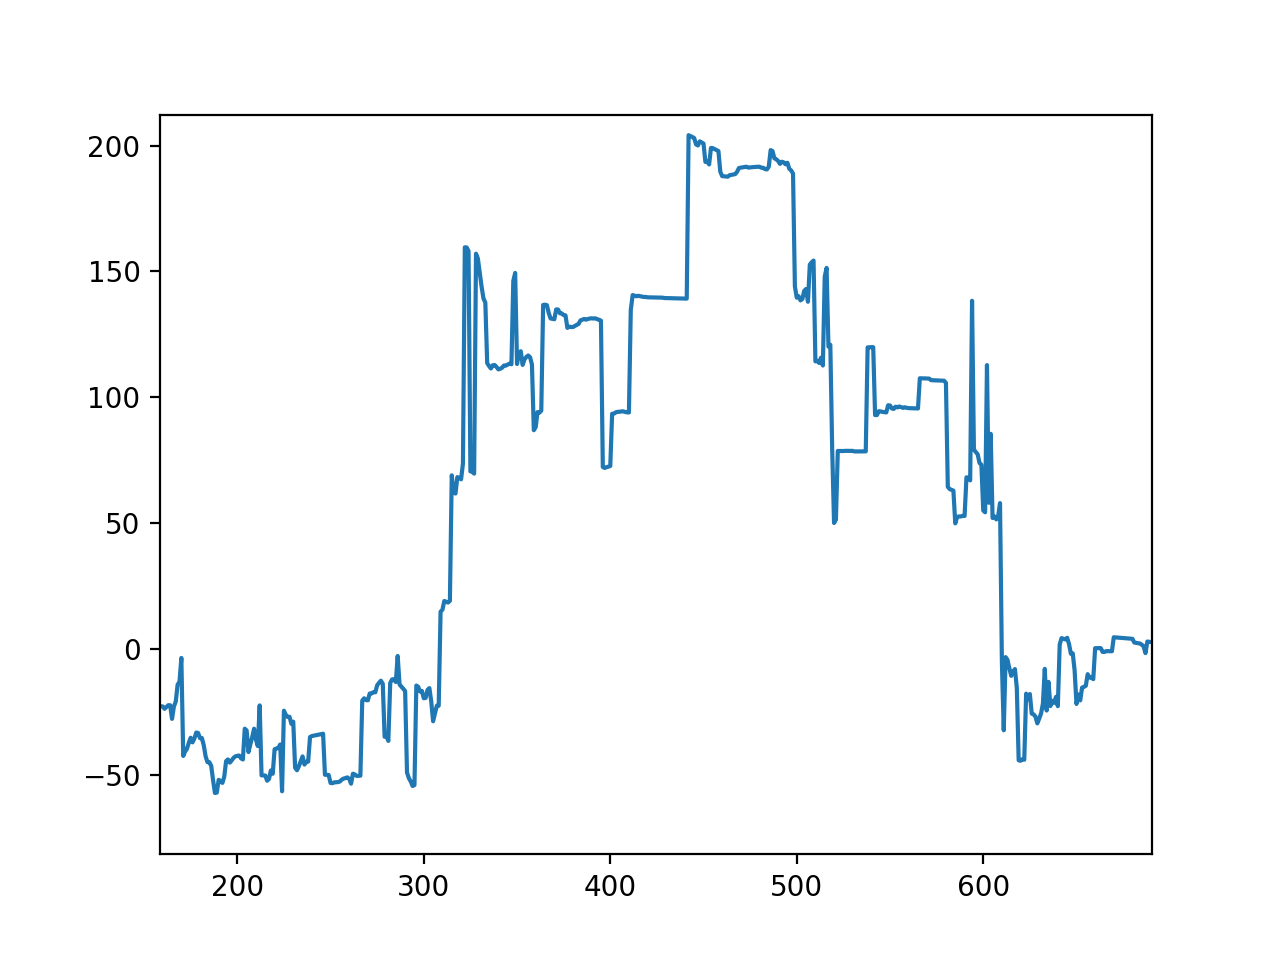

In [114]:
%matplotlib notebook

## This is too messy to do stats, but that is because of keypoint noise. I can keep preparing the code, so it's ready


plt.plot(principalComponents_angle[:,0])
#plt.plot(principalComponents_angle[:,1])
#plt.plot(principalComponents_angle[:,2])

plt.show()

In [104]:
print(np.round(pca_angle.explained_variance_ratio_,2))
print(np.round(pca_angle.components_[0],3))
print(np.round(pca_angle.components_[1],3))
print(np.round(pca_angle.components_[2],3))

[0.35 0.24 0.19 0.06 0.05 0.04 0.04 0.01 0.01 0.01 0.   0.   0.   0.  ]
[-0.255 -0.054 -0.425 -0.434  0.249  0.319 -0.631  0.013  0.01   0.011
  0.024 -0.002  0.     0.   ]
[ 0.694 -0.089 -0.012 -0.262 -0.597  0.128 -0.255  0.014 -0.002  0.041
 -0.033  0.009 -0.    -0.   ]
[-0.638  0.001 -0.079 -0.018 -0.748 -0.143 -0.042 -0.006  0.006 -0.001
  0.054  0.037  0.     0.   ]


In [19]:
import glob
my_dir = './Keypoints/detections/'
print(os.path.abspath(my_dir))

/home/ammon/Documents/Scripts/AnalyzePosture/Keypoints/detections


In [16]:
import os
os.path.abspath(my_dir)

TypeError: expected str, bytes or os.PathLike object, not list

In [23]:
postures_dir = '~/Documents/Scripts/AnalyzePosture/Keypoints/detections/'
os.path.abspath(postures_dir) + '/'

'/home/ammon/Documents/Scripts/AnalyzePosture/~/Documents/Scripts/AnalyzePosture/Keypoints/detections/'

In [27]:
glob.glob(os.path.expanduser('/home/ammon/Documents/Scripts/AnalyzePosture'))

['/home/ammon/Documents/Scripts/AnalyzePosture']

In [34]:
test = np.array([1,2,3,4])

base_ar = np.empty([0,4])
one = np.vstack([base_ar,test])
two = np.vstack([one,test])
print(two)

[[1. 2. 3. 4.]
 [1. 2. 3. 4.]]


In [33]:
np.vstack([base_ar,test])

array([[1., 2., 3., 4.]])

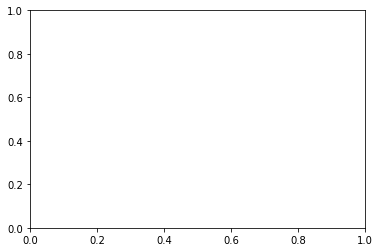

In [35]:
fig,ax = plt.subplots()
ax.set_t

In [13]:
import numpy as np
from scipy.spatial.distance import euclidean

from fastdtw import fastdtw

x = np.array([[1,1,1,1], [2,2,2,3], [3,3,3,3], [3,3,3,4],[4,4,4,4], [5,5,5,5]])
y = np.array([[1,1,1,2],[1,1,1,3],[2,2,2,3], [3,3,3,4], [4,4,4,5],[5,5,5,5]])
distance, path = fastdtw(x, y, dist=euclidean)
print(distance)

4.732050807568877


In [12]:
print(path)

[(0, 0), (0, 1), (1, 2), (2, 3), (3, 3), (4, 4), (5, 5)]


In [6]:
transform = [p[0] for p in path]

In [9]:
print(transform) ##transform is the mapping from x to y
x[transform] ## Remove transform duplicates to get a functional mapping...? 
## Also need to calculate cost. 

[0, 0, 1, 2, 3, 4, 5]


array([[1, 1],
       [1, 1],
       [2, 2],
       [3, 3],
       [3, 3],
       [4, 4],
       [5, 5]])

array([1, 2, 3, 4, 5])

In [1]:
import numpy as np

In [19]:
r_array = np.random.random([10,10])

print(r_array)
np.unravel_index(r_array.argmin(), r_array.shape)

[[0.12289922 0.02880524 0.66294292 0.68989693 0.11622949 0.27631564
  0.52903204 0.62247577 0.51781744 0.19915685]
 [0.44666729 0.36254657 0.53018522 0.31175778 0.30921952 0.64303551
  0.6885822  0.75139469 0.4931861  0.22202125]
 [0.86569627 0.55357155 0.94804578 0.95526218 0.02787873 0.1383378
  0.0340153  0.92477675 0.63958155 0.19486355]
 [0.68594865 0.039527   0.06027236 0.31913685 0.83864616 0.26352309
  0.70370345 0.74031002 0.31323584 0.9759804 ]
 [0.10800833 0.80229786 0.83323513 0.27302701 0.43812291 0.18008573
  0.81105442 0.35887448 0.44476035 0.12733007]
 [0.61284097 0.25893229 0.19386116 0.24529571 0.24266826 0.01082657
  0.68446871 0.82687841 0.45552839 0.20587851]
 [0.88819271 0.53643387 0.25007764 0.28811126 0.79142323 0.16511617
  0.33268342 0.79192697 0.77672886 0.10640684]
 [0.04014138 0.10517536 0.32233826 0.90320812 0.4577442  0.19025126
  0.4328414  0.73645529 0.75122812 0.32335632]
 [0.16076646 0.10881355 0.48465574 0.16873871 0.66241457 0.27242135
  0.751435   

(5, 5)

In [7]:
e_array = np.empty([5,5])
e_array.fill(np.nan)

In [8]:
print(e_array)

[[nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]]


In [10]:
r2_array = np.array(r_array)
r2_array[0,0] = 0
print(r_array)
print(r2_array)

[[0.28482405 0.71841605 0.42362389 0.78988978 0.92675715]
 [0.83052831 0.42127885 0.27805611 0.0490208  0.03176831]
 [0.22750377 0.99928964 0.72518024 0.74627136 0.06494073]
 [0.12304869 0.4563184  0.63421683 0.28010245 0.4951428 ]
 [0.5751727  0.14729742 0.17770843 0.95735277 0.00782102]]
[[0.         0.71841605 0.42362389 0.78988978 0.92675715]
 [0.83052831 0.42127885 0.27805611 0.0490208  0.03176831]
 [0.22750377 0.99928964 0.72518024 0.74627136 0.06494073]
 [0.12304869 0.4563184  0.63421683 0.28010245 0.4951428 ]
 [0.5751727  0.14729742 0.17770843 0.95735277 0.00782102]]


In [13]:
r_array[:-1]

array([[0.28482405, 0.71841605, 0.42362389, 0.78988978, 0.92675715],
       [0.83052831, 0.42127885, 0.27805611, 0.0490208 , 0.03176831],
       [0.22750377, 0.99928964, 0.72518024, 0.74627136, 0.06494073],
       [0.12304869, 0.4563184 , 0.63421683, 0.28010245, 0.4951428 ]])

In [22]:
i = 4
j = 7

A = np.arange(10)
sub_index = (A[(A != j) & (A != i)])
print(sub_index)

[0 1 2 3 5 6 8 9]


In [27]:
np.array(r_array[sub_index])[:,sub_index]

array([[0.12289922, 0.02880524, 0.66294292, 0.68989693, 0.27631564,
        0.52903204, 0.51781744, 0.19915685],
       [0.44666729, 0.36254657, 0.53018522, 0.31175778, 0.64303551,
        0.6885822 , 0.4931861 , 0.22202125],
       [0.86569627, 0.55357155, 0.94804578, 0.95526218, 0.1383378 ,
        0.0340153 , 0.63958155, 0.19486355],
       [0.68594865, 0.039527  , 0.06027236, 0.31913685, 0.26352309,
        0.70370345, 0.31323584, 0.9759804 ],
       [0.61284097, 0.25893229, 0.19386116, 0.24529571, 0.01082657,
        0.68446871, 0.45552839, 0.20587851],
       [0.88819271, 0.53643387, 0.25007764, 0.28811126, 0.16511617,
        0.33268342, 0.77672886, 0.10640684],
       [0.16076646, 0.10881355, 0.48465574, 0.16873871, 0.27242135,
        0.751435  , 0.06861369, 0.58452765],
       [0.30715623, 0.26005574, 0.14593131, 0.27300033, 0.07362849,
        0.87292077, 0.04438781, 0.97743004]])

In [1]:
## Load packages and data

import numpy as np
import pickle
from align_postures import Trajectory
import os
from matplotlib import pyplot as plt
from scipy.spatial.distance import euclidean

from fastdtw import fastdtw

with open('./seqs.dat','rb') as f:
    seqs = pickle.load(f)
    
with open('./path_dict.pkl','rb') as f:
    path_dict = pickle.load(f)

In [2]:
### Build color dicts
from matplotlib import colors as mcolors
from matplotlib import cm

## Song Colormap: 
# set up color dicts, etc for Plotting:
songs_ordered = ['BDY.wav','BOD.wav','LB.wav','2M.wav','DMG.wav','LB-.wav','BDY-.wav']
songs = songs_ordered

song_colors = list(list(cm.viridis(int(c * 255 / len(songs)))) for c in range(len(songs)))

#color_dict = dict(zip(songs,mcolors.BASE_COLORS.keys()))
songColors = dict(zip(songs,song_colors))
for s in songs:
    songColors['m'+s] = songColors[s]

dates = sorted(set(seq.date for seq in seqs[:39]))
date_colors = list(list(cm.viridis(int(c * 255 / len(dates)))) for c in range(len(dates)))
dateColors = dict(zip(dates, date_colors))

hours = sorted(set(seq.time.split(':')[0] for seq in seqs[:39]))
hour_colors = list(list(cm.viridis(int(c * 255 / len(hours)))) for c in range(len(hours)))
hourColors = dict(zip(hours,hour_colors))

# default colors
prop_cycle = plt.rcParams['axes.prop_cycle']
p_colors = prop_cycle.by_key()['color']

# Jet colors
t_colors = list(list(cm.jet(int(c * 255 / 10))) for c in range(10))

print(p_colors)

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


[27, 38]


/home/ammon/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


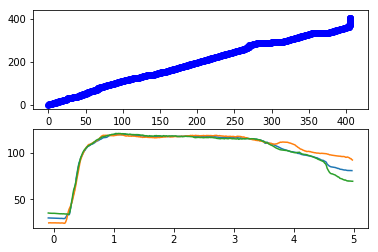

In [16]:
print(seqs[40].parents)
path = path_dict['27,38']

fig,(ax1,ax2) = plt.subplots(2)
for p in path:
    ax1.scatter(p[0],p[1],color='blue')
    
ax2.plot(seqs[40].ts,seqs[40].data[:,0])
ax2.plot(seqs[27].ts,seqs[27].data[:,0])
ax2.plot(seqs[38].ts,seqs[38].data[:,0])
fig.show()

In [8]:
print(seqs[76].parents)
print(seqs[75].parents)
print(seqs[74].parents)


#plt.plot(seqs[75].ts,seqs[75].data[:,0])
plt.plot(seqs[73].ts,seqs[73].data[:,0],color='g')
#plt.plot(seqs[73].ts,seqs[73].data[:,1],color='b')
plt.plot(seqs[74].ts,seqs[74].data[:,0],color='orange')
#plt.plot(seqs[74].ts,seqs[74].data[:,1],color='r')

plt.show()

[8, 75]
[73, 74]
[70, 71]


<IPython.core.display.Javascript object>


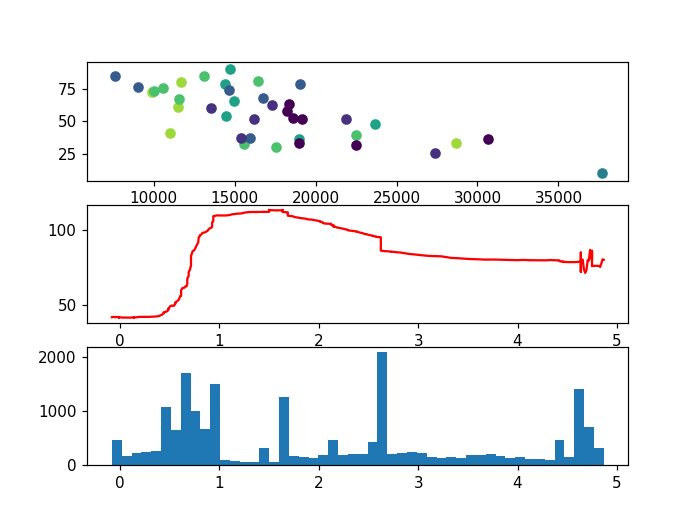

0 11719.005079671879 80.362475451143
1 11497.131222867194 60.980894244647985
2 9059.13711251758 76.4093328926172
3 28666.65921841212 33.13790308155722
4 14736.107013798819 89.58335841218022
5 19004.065338822253 36.41248667388809
6 16464.549179451165 80.73545587559218
7 16200.439886357428 51.32921752366036
8 37668.33381163865 10.16738909632248
9 23689.352858955084 47.44686134608907
10 16747.61813111912 68.03559928144026
11 11586.784083330082 67.06336699253659
12 19133.609088720692 51.91410257686891
13 22510.70888033402 39.61855202016315
14 27396.900533298816 25.35518221426857
15 17570.036634072254 30.23010559040265
16 7613.081828416011 84.67557768174697
17 9910.73865553125 72.24188966157082
18 18600.674060890637 52.30765063463341
19 13569.642067220713 60.02809134121166
20 15569.53840465038 32.31259426735718
21 14954.673954802724 65.5825383018361
22 30660.99978156642 36.48950022664887
23 18383.752959992187 63.04988707303681
24 14407.626079929682 78.33682906807967
25 10567.073795072263 75

In [136]:
from align_postures import dtw_align
%matplotlib notebook

fig,(ax1,ax2,ax3) = plt.subplots(3)
ax2.plot(seqs[75].ts,seqs[75].response_data[:,0],color='red')
costs = np.zeros(len(seqs[75].ts))
cost_counts = []

for s in range(39):
    distance,path = fastdtw(seqs[75].vel,seqs[s].vel)
    aligned_data, aligned_ts, cost, cost_points = dtw_align(seqs[75],seqs[s],path=path,strat='canon')
    print(seqs[s].index,distance,cost)
    round_costs = np.round(cost_points * 10)
    for t in range(len(round_costs)):
        [cost_counts.append(x) for x in [aligned_ts[t]]*int(round_costs[t])]
    ax1.scatter(distance,cost,color=songColors[seqs[s].song])
    #ax2.plot(aligned_ts,aligned_data[:,0],alpha=.3,color=songColors[seqs[s].song])
    
ax3.hist(cost_counts,bins=50)

fig.show()

In [138]:
A = np.load('./all_distances.npy')

X = A[:39]
for i in range(len(X)):
    for j in range(len(X)):
        if i == j:
            X[i,j] = 0
        else:
            X[j,i] = X[i,j]
print(X)

[[    0.          4837.26960062  4478.56093567 ...  6609.73164664
   7219.88969065  7333.64246354]
 [ 4837.26960062     0.          7546.16541039 ...  6661.70559371
   7026.11579333  9706.90246712]
 [ 4478.56093567  7546.16541039     0.         ...  7688.84865047
   9103.30829549 10877.01916414]
 ...
 [ 6609.73164664  6661.70559371  7688.84865047 ...     0.
   9246.14734004  8608.05881699]
 [ 7219.88969065  7026.11579333  9103.30829549 ...  9246.14734004
      0.          8125.95957542]
 [ 7333.64246354  9706.90246712 10877.01916414 ...  8608.05881699
   8125.95957542     0.        ]]


In [28]:
import numpy as np
from sklearn.manifold import TSNE

A = np.load('./all_distances.npy')

X = A[:39]
for i in range(len(X)):
    for j in range(len(X)):
        if i == j:
            X[i,j] = 0
        else:
            X[j,i] = X[i,j]
            
X_embedded = TSNE(n_components=2).fit_transform(X)
X_embedded.shape

(39, 2)

<IPython.core.display.Javascript object>


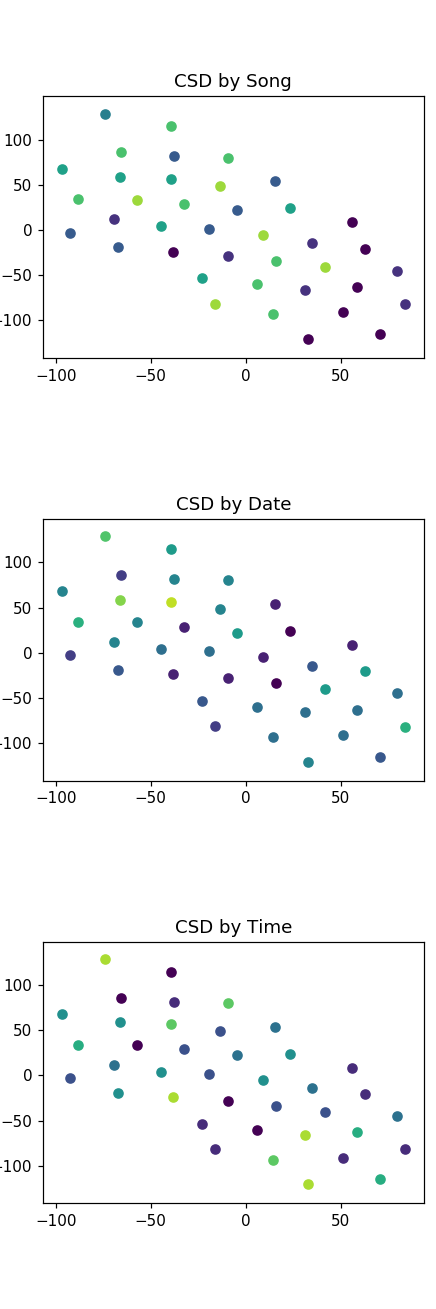

In [137]:
fig,[ax1,ax2,ax3] = plt.subplots(3)

for i in range(len(X_embedded)):
    ax1.scatter(X_embedded[i,0],X_embedded[i,1],facecolor=songColors[seqs[i].song])
    ax2.scatter(X_embedded[i,0],X_embedded[i,1],facecolor=dateColors[seqs[i].date])
    ax3.scatter(X_embedded[i,0],X_embedded[i,1],facecolor=hourColors[seqs[i].time.split(':')[0]])
    
ax1.set_title('CSD by Song')
ax2.set_title('CSD by Date')
ax3.set_title('CSD by Time')

fig.tight_layout()
fig.set_size_inches([4,12])
fig.show()

In [128]:
from scipy.ndimage.filters import gaussian_filter1d
np.transpose(gaussian_filter1d(np.transpose(data),sigma=1))

array([[7.68465529e+01, 5.66206027e-05],
       [6.22379656e+01, 8.21636812e-05],
       [4.63973552e+01, 1.22130898e-04],
       ...,
       [1.08066342e+02, 1.30538068e-04],
       [1.08043647e+02, 1.30461798e-04],
       [1.08036403e+02, 1.30300662e-04]])

<IPython.core.display.Javascript object>


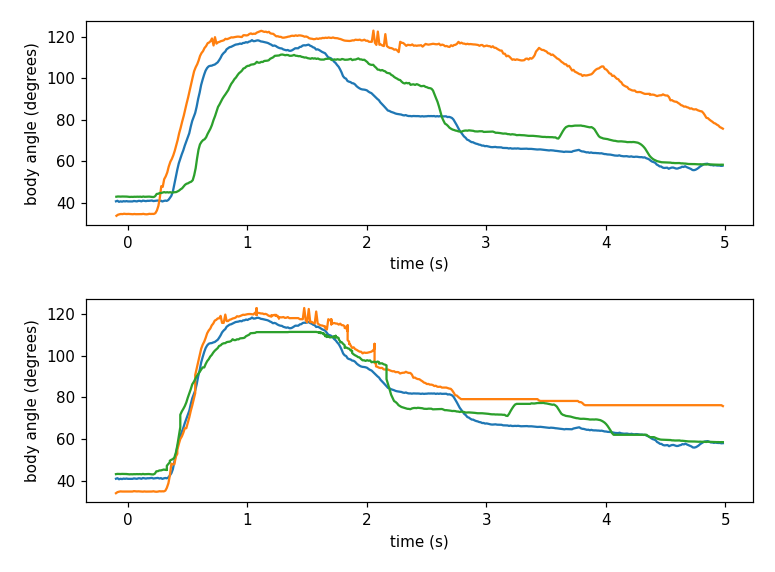

> /home/ammon/Documents/Scripts/AnalyzePosture/align_postures.py(142)dtw_align()
-> ## This however is big
(Pdb) c
> /home/ammon/Documents/Scripts/AnalyzePosture/align_postures.py(142)dtw_align()
-> ## This however is big
(Pdb) c


In [26]:
fig, (ax1,ax2) = plt.subplots(2)

a,b,c = (0,25,7)
ax1.plot(seqs[0].ts,seqs[0].data[:,0])
ax1.plot(seqs[b].ts,seqs[b].data[:,0])
ax1.plot(seqs[c].ts,seqs[c].data[:,0])

ax1.set_xlabel('time (s)')
ax1.set_ylabel('body angle (degrees)')

aligned_b, aligned_tsB, cost, cost_points = dtw_align(seqs[0],seqs[b],strat='canon')
aligned_c, aligned_tsC, cost_c, cost_points_c = dtw_align(seqs[0],seqs[c],strat='canon')

ax2.plot(seqs[0].ts,seqs[0].data[:,0])
ax2.plot(aligned_tsB,aligned_b[:,0])
ax2.plot(aligned_tsC,aligned_c[:,0])

ax2.set_xlabel('time (s)')
ax2.set_ylabel('body angle (degrees)')

fig.tight_layout()
fig.show()
fig.savefig('multi-postures.png')

In [66]:
from Bio.Phylo import TreeConstruction
from Bio import Phylo
from io import StringIO

hierarchy_str = str(seqs[-1].hierarchy)
hierarchy_str = hierarchy_str.replace('[','(')
hierarchy_str = hierarchy_str.replace(']',')')
tree = Phylo.read(StringIO(hierarchy_str),"newick")

In [138]:
for clade in tree.find_clades():
    if not clade.name == None:
        clade_index = int(clade.name)
        if clade_index in list(range(39)):
            raw_color = dateColors[seqs[clade_index].date]
            raw_color = hourColors[seqs[clade_index].time.split(':')[0]]
            raw_color = songColors[seqs[clade_index].song]
            cc = np.round(np.array(raw_color[:3]) * 255)

            clade.color = Phylo.PhyloXML.BranchColor(int(cc[0]),int(cc[1]),int(cc[2]))

<IPython.core.display.Javascript object>


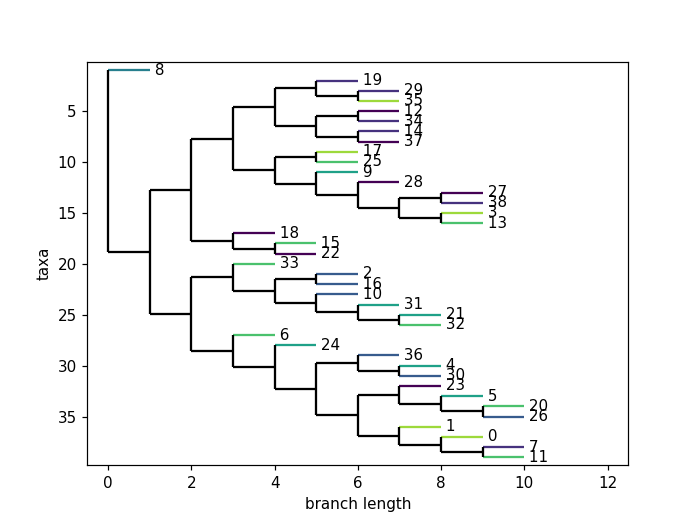

In [139]:
Phylo.draw(tree)

<IPython.core.display.Javascript object>


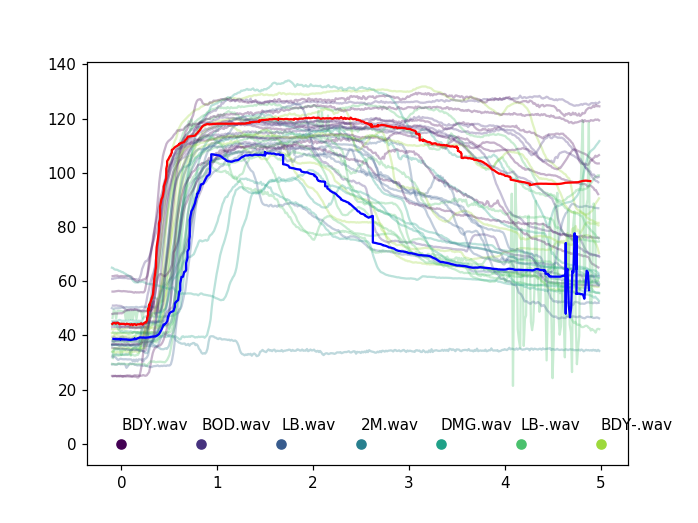

BDY-.wav 0
BDY-.wav 1
LB.wav 2
BDY-.wav 3
DMG.wav 4
DMG.wav 5
LB-.wav 6
BOD.wav 7
m2M.wav 8
DMG.wav 9
LB.wav 10
LB-.wav 11
BDY.wav 12
LB-.wav 13
BOD.wav 14
LB-.wav 15
LB.wav 16
BDY-.wav 17
BDY.wav 18
BOD.wav 19
LB-.wav 20
mDMG.wav 21
BDY.wav 22
BDY.wav 23
DMG.wav 24
LB-.wav 25
LB.wav 26
BDY.wav 27
BDY.wav 28
BOD.wav 29
LB.wav 30
mDMG.wav 31
LB-.wav 32
LB-.wav 33
BOD.wav 34
BDY-.wav 35
LB.wav 36
BDY.wav 37
BOD.wav 38


In [140]:
fig,ax = plt.subplots()


for s in seqs[:39]:
    print(s.song,s.index)
    ax.plot(s.ts,s.data[:,0],alpha=.3,color=songColors[s.song])
ax.plot(seqs[74].ts,seqs[74].data[:,0],color='blue')
ax.plot(seqs[73].ts,seqs[73].data[:,0],color='red')

for c in range(len(songs_ordered)):
    ax.scatter(c*5/6,0,color=songColors[songs_ordered[c]])
    ax.text(c*5/6,0+5,songs_ordered[c])
fig.show()

<IPython.core.display.Javascript object>


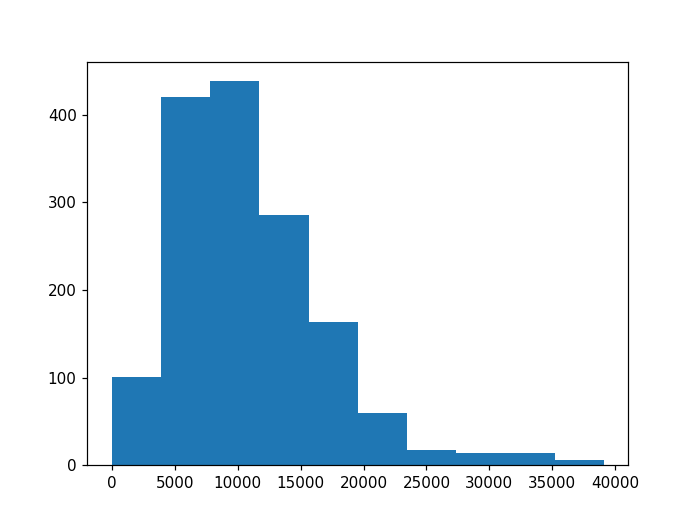

In [30]:
fig,ax = plt.subplots()
ax.hist(X.flatten())

fig.show()

<IPython.core.display.Javascript object>


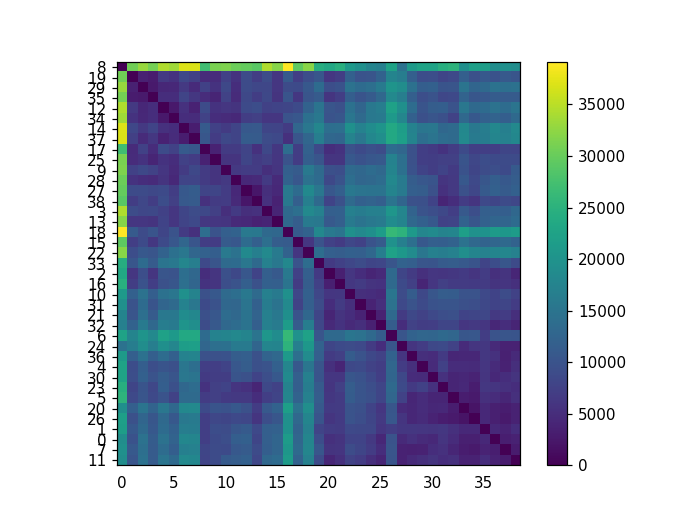

In [126]:
fig,ax = plt.subplots()

heatmap = ax.imshow(X[int_list][:,int_list])
#ax.set_xticks(range(len(int_list)))
ax.set_yticks(range(len(int_list)))
#ax.set_xticklabels(int_list)
ax.set_yticklabels(int_list)
ax.tick_params(axis='x',bottom=False)
fig.colorbar(heatmap)
#ax2.imshow(range(X.min(),X.max()))

fig.show()

In [47]:
from io import StringIO

In [81]:
str_list = str(seqs[-1].hierarchy).replace('[','').replace(']','').split(', ')
int_list = [int(x) for x in str_list]


In [82]:
print(int_list)

[8, 19, 29, 35, 12, 34, 14, 37, 17, 25, 9, 28, 27, 38, 3, 13, 18, 15, 22, 33, 2, 16, 10, 31, 21, 32, 6, 24, 36, 4, 30, 23, 5, 20, 26, 1, 0, 7, 11]


In [79]:
back_list = int_list.reverse()

In [80]:
print(back_list,int_list)

None [11, 7, 0, 1, 26, 20, 5, 23, 30, 4, 36, 24, 6, 32, 21, 31, 10, 16, 2, 33, 22, 15, 18, 13, 3, 38, 27, 28, 9, 25, 17, 37, 14, 34, 12, 35, 29, 19, 8]


In [87]:
back_list = list(reversed(int_list))